## Contexto

A base de dados `atraso_voos.csv` contém informações detalhadas sobre voos que foram realizados por passageiros. Cada registro (ou linha) representa o registro de **um passageiro** em um voo específico.

### Atributos da Base de Dados

Os atributos presentes na base de dados oferecem informações diversas, tais como:

- **Informações do Passageiro:** Dados específicos sobre a pessoa que realizou o voo.
  
- **Serviços Consumidos:** Detalhes sobre os serviços que foram utilizados pelo passageiro durante o voo.
  
- **Detalhes do Voo:** Informações pertinentes sobre o voo em questão.

## Objetivo

A **classe alvo**, ou seja, a variável que desejamos prever, é o **tempo de atraso para a partida** do voo.

O principal intuito é:

- Testar diferentes arquiteturas de modelos de Machine Learning.
  
- Verificar se é possível utilizar os atributos disponíveis para prever o tempo de atraso na partida dos voos utilizando técnicas de Machine Learning.
  
- Analisar o desempenho do(s) modelo(s) construído(s) com base nos dados fornecidos.

## OBS: ``Não se sabe se a base de dados possui atributos ruins e nem se só possui atributos bons.``

In [1]:
# Bibliotecas utilizadas:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1
import seaborn as sns

# Questão 1: Preparação dos Dados

Nesta etapa, você deverá realizar uma série de procedimentos para preparar os dados para os modelos de Machine Learning. Siga os passos abaixo com atenção:

**Atenção:** Certifique-se de realizar cada passo com cuidado e verificar os dados em cada etapa para garantir que a preparação dos dados seja realizada corretamente.



## A. Leitura da Base de Dados

- Realize a leitura da base de dados `atraso_voos.csv`.


In [2]:
# Responda aqui

df = pd.read_csv('atraso_voos.csv')


## B. Conversão de Valores

- Converta **valores textuais** para **valores numéricos**.
  
  **Nota:** A base de dados não contém valores nulos.


In [3]:
# Responda aqui

le = LabelEncoder()

for i in df.describe(include='O').T.index:
    df[i] = le.fit_transform(df[i])

df.dtypes == 'object'

satisfacao                              False
genero                                  False
tipo_cliente                            False
idade                                   False
tipo_viagem                             False
classe                                  False
distancia_voo                           False
conforto_assento                        False
conveniencia_horario_partida_chegada    False
comida_bebida                           False
localizacao_portao                      False
servico_wifi_voo                        False
entretenimento_voo                      False
suporte_online                          False
facilidade_reserva_online               False
servico_bordo                           False
espaco_pernas                           False
manuseio_bagagem                        False
servico_checkin                         False
limpeza                                 False
embarque_online                         False
atraso_partida_minutos            


## C. Separação dos Dados

- Separe os dados em `X` (atributos) e `y` (variável dependente).


In [4]:
# Responda aqui

X = df.drop('atraso_partida_minutos', axis=1)
y = df[['atraso_partida_minutos']]


## D. Divisão dos Dados

- Divida os dados em conjuntos de treinamento (60%), validação (10%) e teste (30%) para `X` e `y`.


In [5]:
# Responda aqui

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=.6, random_state=20)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, train_size=(3/4), random_state=20)

del(X_temp, y_temp)


## E. Normalização dos Dados

- Utilize a técnica de normalização **Min-Max** para normalizar os dados.
  
  - Primeiramente, aplique o método `fit_transform` nos dados de treinamento (`X_train`).
    
  - Em seguida, utilize o método `transform` nos dados de teste (`X_test`) e validação (`X_val`).


In [6]:
# Responda aqui

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

X_test = scaler_X.transform(X_test)
X_val = scaler_X.transform(X_val)
y_test = scaler_y.transform(y_test)
y_val = scaler_y.transform(y_val)


# Questão 2: Construção e Avaliação do Modelo Simples

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural simples. Siga as subinstruções com atenção para cada item.


## A - Construção do Modelo

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir **10 camadas ocultas**.

- Na quinta camada oculta o modelo deve possuir 128 neurônios. (demais camadas fica ao seu critério)
  
- **Não** utilize técnicas de dropout e regularização do kernel no modelo.


In [7]:
# Responda aqui

def create_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)), # entrada
        Dense(128, activation='relu'), # 1
        Dense(128, activation='relu'), # 2
        Dense(128, activation='relu'), # 3
        Dense(128, activation='relu'), # 4
        Dense(128, activation='relu'), # 5
        Dense(64, activation='relu'), # 6
        Dense(64, activation='relu'), # 7
        Dense(64, activation='relu'), # 8
        Dense(32, activation='relu'), # 9
        Dense(16, activation='relu'), # 10
        Dense(1, activation='linear') # saída
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


## B - Treinamento do Modelo

- **Crie um modelo chamdo modelo_simples** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento e validação por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


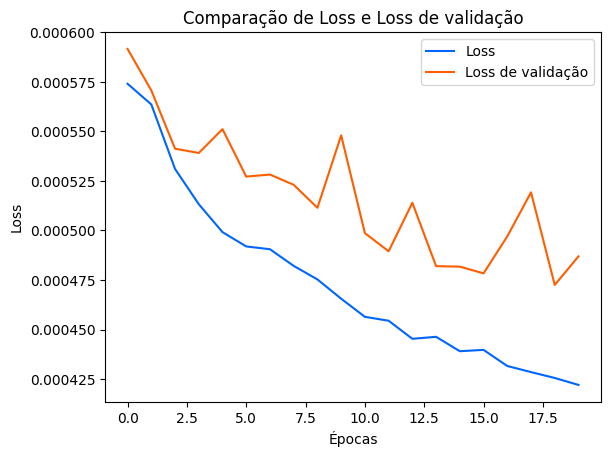

In [8]:
# Responda aqui

model = create_model(X.shape[1])

history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history.history['loss'], label='Loss', color='#0065ff')
plt.plot(history.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()


## C - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [9]:
# Responda aqui

predict_treino = model.predict(X_train)
predict_treino = scaler_y.inverse_transform(predict_treino)

real_treino = scaler_y.inverse_transform(y_train)

mse_treino = mean_squared_error(predict_treino, real_treino)

print(f'Risco empírico (MSE treino): {mse_treino:.3f}')

2428/2428 [==============================] - 3s 1ms/step
Risco empírico (MSE treino): 1083.686



## D - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [10]:
# Responda aqui

predict_teste = model.predict(X_test)
predict_teste = scaler_y.inverse_transform(predict_teste)

real_teste = scaler_y.inverse_transform(y_test)

mse_teste = mean_squared_error(predict_teste, real_teste)

print(f'Risco estrutural (MSE teste): {mse_teste:.3f}')

1214/1214 [==============================] - 1s 1ms/step
Risco estrutural (MSE teste): 1107.296



## E - Classificação do Modelo

- Com base nos valores e gráficos anteriores, **classifique o modelo** como:
  
  - Um modelo com Overfitting
  
  - Um modelo sem overfitting

### Escreva neste bloco de markdown sua resposta

O modelo não possui *overfitting*.


## F - Justificativa

- **Justifique a sua resposta** do item 2.E, explicando os motivos que o levaram a classificar o modelo desta maneira.

Utilize **suas próprias palavras**.

### Escreva neste bloco de markdown sua resposta

 O *loss* de teste foi muito próximo ao de validação, seu erro de treino (risco empírico) foi extremamente semelhante ao seu erro de teste (risco estrutural); portanto, a conclusão é que o modelo não se sobreajustou aos dados de treinamento e consegue performar com dados diferentes.

# Questão 3: Construção e Avaliação do Modelo com regularização de kernel l1, l2 ou l1 e l2

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização de kernel l1, l2 ou l1 e l2

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de regularização do kernel no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [11]:
# Responda aqui

def create_model_regularized(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)), # entrada
        Dense(128, activation='relu'), # 1
        Dense(128, activation='relu', kernel_regularizer=l1(l1=.02)), # 2
        Dense(128, activation='relu', kernel_regularizer=l1(l1=.03)), # 3
        Dense(128, activation='relu', kernel_regularizer=l1(l1=.01)), # 4
        Dense(128, activation='relu'), # 5
        Dense(64, activation='relu'), # 6
        Dense(64, activation='relu'), # 7
        Dense(64, activation='relu'), # 8
        Dense(32, activation='relu'), # 9
        Dense(16, activation='relu'), # 10
        Dense(1, activation='linear') # saída
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


## B - Justificativa das escolhas dos regularizadores de kernel

- **Justifique** a utilização o l1, l2 ou o Elastic Net (l1 e l2 juntos).

- **Justifique** a utilização do regularizador de kernel nas camadas que foram aplicadas.

### Escreva neste bloco de markdown sua resposta

A regularização de kernel utilizada foi a l1 (Lasso), porque a base nitidamente possui uma alta quantidade de dados irrelevantes (se o passageiro consumiu algo no voo, se houve entretenimento ou *wifi*, etc.). A regularização foi aplicada logo nas primeiras camadas ocultas do modelo justamente para filtrar o ruído o quanto antes para otimizar o modelo.


## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_reg_ker** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


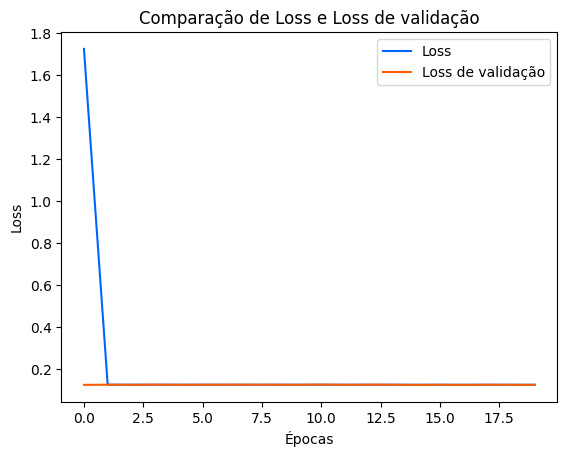

In [12]:
# Responda aqui

modelo_reg_ker = create_model_regularized(X.shape[1])

history = modelo_reg_ker.fit(
    X_train, y_train,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history.history['loss'], label='Loss', color='#0065ff')
plt.plot(history.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [13]:
# Responda aqui

predict_treino = modelo_reg_ker.predict(X_train)
predict_treino = scaler_y.inverse_transform(predict_treino)

real_treino = scaler_y.inverse_transform(y_train)

mse_treino = mean_squared_error(predict_treino, real_treino)

print(f'Risco empírico (MSE treino): {mse_treino:.3f}')

2428/2428 [==============================] - 3s 1ms/step
Risco empírico (MSE treino): 1458.352



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [14]:
# Responda aqui

predict_teste = modelo_reg_ker.predict(X_test)
predict_teste = scaler_y.inverse_transform(predict_teste)

real_teste = scaler_y.inverse_transform(y_test)

mse_teste = mean_squared_error(predict_teste, real_teste)

print(f'Risco estrutural (MSE teste): {mse_teste:.3f}')

1214/1214 [==============================] - 1s 992us/step
Risco estrutural (MSE teste): 1407.293


# Questão 4: Construção e Avaliação do Modelo com Dropout

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização a utilização do Dropout

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de dropout no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [15]:
# Responda aqui

def create_model_dropout(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)), # entrada
        Dense(128, activation='relu'), # 1
        Dense(128, activation='relu'), # 2
        Dense(128, activation='relu'), # 3
        Dense(128, activation='relu'), # 4
        Dense(128, activation='relu'), # 5
        Dropout((0.015)),
        Dense(64, activation='relu'), # 6
        Dense(64, activation='relu'), # 7
        Dense(64, activation='relu'), # 8
        Dense(32, activation='relu'), # 9
        Dense(16, activation='relu'), # 10
        Dense(1, activation='linear') # saída
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

## B - Justificativa do Dropout

- **Justifique** a utilização a localização do dropout.

### Escreva neste bloco de markdown sua resposta

O *Dropout* como técnica de regularização serve para previnir *overfitting*: quando um modelo está se sobreajustando aos dados de treinamento, o *dropout* serve para desligar, aleatoriamente, uma quantidade dos neurônios (definido em porcentagem, no modelo acima foi utilizado 0.15%) para garantir que, até o fim do treinamento, nenhum neurônio vai estar dependente de alguma conexão feita que pode vir a ser falha. No modelo foi utilizado uma taxa baixíssima de *dropout* em apenas uma camada pois não há *overfitting* no modelo normal, então, não há muita utilidade para camadas de *dropout*.

## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_dropout** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.

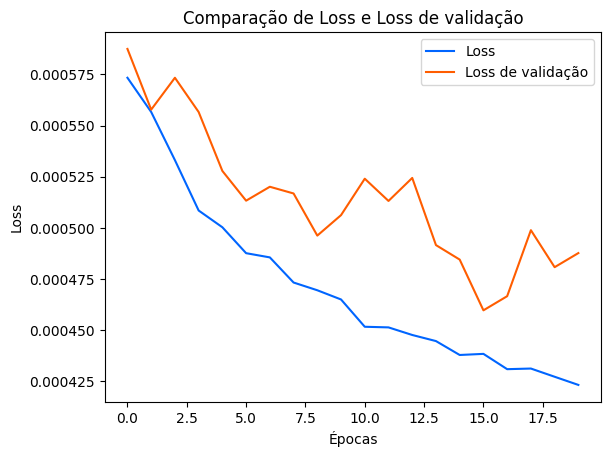

In [16]:
# Responda aqui

modelo_dropout = create_model_dropout(X.shape[1])

history = modelo_dropout.fit(
    X_train, y_train,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history.history['loss'], label='Loss', color='#0065ff')
plt.plot(history.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [17]:
# Responda aqui

predict_treino = modelo_dropout.predict(X_train)
predict_treino = scaler_y.inverse_transform(predict_treino)

real_treino = scaler_y.inverse_transform(y_train)

mse_treino = mean_squared_error(predict_treino, real_treino)

print(f'Risco empírico (MSE treino): {mse_treino:.3f}')

2428/2428 [==============================] - 2s 977us/step
Risco empírico (MSE treino): 1059.120



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [19]:
# Responda aqui

predict_teste = modelo_dropout.predict(X_test)
predict_teste = scaler_y.inverse_transform(predict_teste)

real_teste = scaler_y.inverse_transform(y_test)

mse_teste = mean_squared_error(predict_teste, real_teste)

print(f'Risco estrutural (MSE teste): {mse_teste:.3f}')

1214/1214 [==============================] - 1s 989us/step
Risco estrutural (MSE teste): 1114.178


# Questão 5: Separação da Base de Treinamento

Divida o conjunto de dados de treinamento em 4 subconjuntos, cada um contendo 25% dos dados originais de treinamento.

## Instruções

- Divida a base de treinamento (`X_train` e `y_train`) em 4 subconjuntos, cada um com 25% dos dados.

- Nomeie os subconjuntos como `X_train_1`, `y_train_1`, `X_train_2`, `y_train_2`, e assim por diante.

In [20]:
# Responda aqui
X_train_1, X_temp, y_train_1, y_temp = train_test_split(X_train, y_train, train_size=(1/4), random_state=20)
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_temp, y_temp, train_size=(1/3), random_state=20)
X_train_3, X_train_4, y_train_3, y_train_4 = train_test_split(X_temp_2, y_temp_2, train_size=(1/2), random_state=20)

del(X_temp, y_temp, X_temp_2, y_temp_2)

# Questão 6: Seleção e Treinamento de Modelos

Nesta questão, você irá selecionar o melhor dos 3 modelos com base nas questões anteriores.



## A - Seleção e Instanciação do Modelo

- **Selecione o melhor modelo** com base nos experimentos e métricas observadas nas questões anteriores.
- **Crie 4 instâncias** deste modelo utilizando a função correspondente.

```python
# Supondo que o melhor modelo seja 'create_model_dropout'
modelo_dropout_1 = create_model_dropout()
modelo_dropout_2 = create_model_dropout()
modelo_dropout_3 = create_model_dropout()
modelo_dropout_4 = create_model_dropout()


In [21]:
# Responda aqui

modelo_1 = create_model(X.shape[1])
modelo_2 = create_model(X.shape[1])
modelo_3 = create_model(X.shape[1])
modelo_4 = create_model(X.shape[1])

## B - Treinamento do Modelo 1 e Visualização do Gráfico

- **Treine o modelo 1** por 20 épocas utilizando `X_train_1` e `y_train_1`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

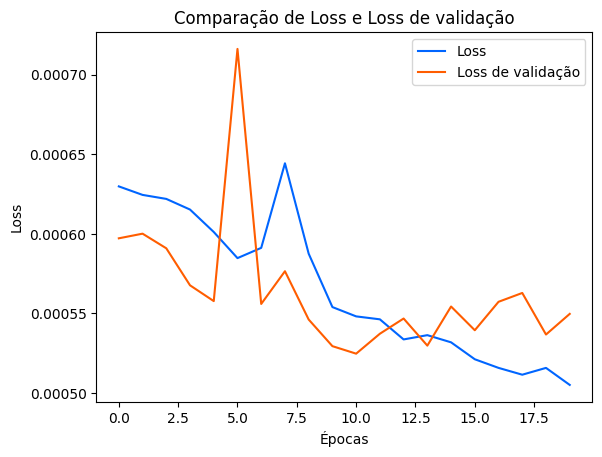

In [22]:
# Responda aqui

modelo_1.compile(loss='mean_squared_error', optimizer='adam')

history_1 = modelo_1.fit(
    X_train_1, y_train_1,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history_1.history['loss'], label='Loss', color='#0065ff')
plt.plot(history_1.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()

## C - Treinamento do Modelo 2 e Visualização do Gráfico

- **Treine o modelo 2** por 20 épocas utilizando `X_train_2` e `y_train_2`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

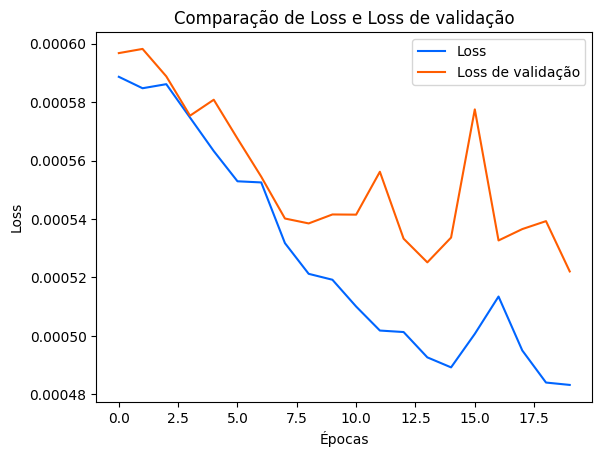

In [23]:
# Responda aqui

modelo_2.compile(loss='mean_squared_error', optimizer='adam')

history_2 = modelo_2.fit(
    X_train_2, y_train_2,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history_2.history['loss'], label='Loss', color='#0065ff')
plt.plot(history_2.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()

## D - Treinamento do Modelo 3 e Visualização do Gráfico

- **Treine o modelo 3** por 20 épocas utilizando `X_train_3` e `y_train_3`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

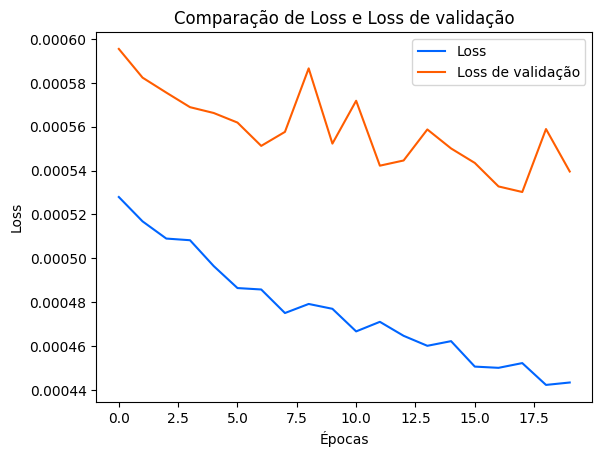

In [24]:
# Responda aqui

modelo_3.compile(loss='mean_squared_error', optimizer='adam')

history_3 = modelo_3.fit(
    X_train_3, y_train_3,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history_3.history['loss'], label='Loss', color='#0065ff')
plt.plot(history_3.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()

## E - Treinamento do Modelo 4 e Visualização do Gráfico

- **Treine o modelo 4** por 20 épocas utilizando `X_train_4` e `y_train_4`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

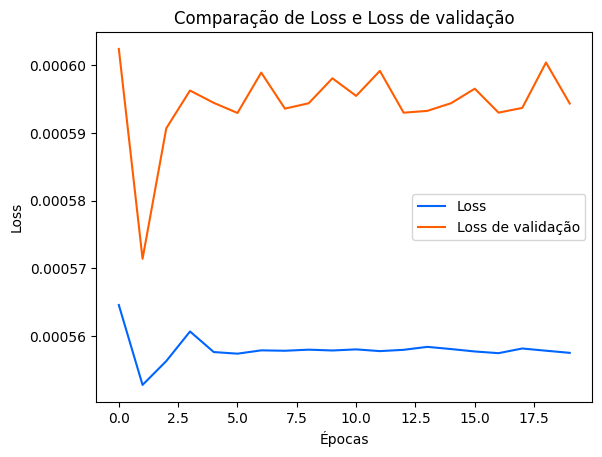

In [25]:
# Responda aqui

modelo_4.compile(loss='mean_squared_error', optimizer='adam')

history_4 = modelo_4.fit(
    X_train_4, y_train_4,
    epochs=20,
    verbose=0,
    validation_data=(X_val, y_val)
)

plt.plot(history_4.history['loss'], label='Loss', color='#0065ff')
plt.plot(history_4.history['val_loss'], label='Loss de validação', color='#ff5d00')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparação de Loss e Loss de validação')
plt.legend()
plt.show()

## Questão 7: Erros dos Modelos


## A: Erro Estrutural dos Modelos

Nesta etapa, você deverá calcular e exibir o erro estrutural para cada um dos 4 modelos treinados na questão anterior. Lembre-se de que o erro estrutural deve ser calculado utilizando o conjunto de treinamento específico que foi usado para treinar cada modelo.

### Instruções:

- Calcule o erro estrutural para o `modelo_1` utilizando `X_train_1` e `y_train_1`.
- Calcule o erro estrutural para o `modelo_2` utilizando `X_train_2` e `y_train_2`.
- Calcule o erro estrutural para o `modelo_3` utilizando `X_train_3` e `y_train_3`.
- Calcule o erro estrutural para o `modelo_4` utilizando `X_train_4` e `y_train_4`.

### Nota:

Certifique-se de que os cálculos estão corretos (desnormalizados) e refletem o desempenho dos modelos nos dados com os quais foram treinados. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de forma clara e concisa.

In [26]:
# Responda aqui

print('Modelo 1:')

predictions_1_s = modelo_1.predict(X_test).flatten()
mse_1_s = mean_squared_error(y_test, predictions_1_s)

print(f'\tRisco estrutural (MSE teste): {mse_1_s}')

print('\n')

print('Modelo 2:')

predictions_2_s = modelo_2.predict(X_test).flatten()
mse_2_s = mean_squared_error(y_test, predictions_2_s)

print(f'\tRisco estrutural (MSE teste): {mse_2_s}')

print('\n')

print('Modelo 3:')

predictions_3_s = modelo_3.predict(X_test).flatten()
mse_3_s = mean_squared_error(y_test, predictions_3_s)

print(f'\tRisco estrutural (MSE teste): {mse_3_s}')

print('\n')

print('Modelo 4:')

predictions_4_s = modelo_4.predict(X_test).flatten()
mse_4_s = mean_squared_error(y_test, predictions_4_s)

print(f'\tRisco estrutural (MSE teste): {mse_4_s}')

print('\n')

Modelo 1:
1214/1214 [==============================] - 1s 1ms/step
	Risco estrutural (MSE teste): 0.0004904979557909717


Modelo 2:
1214/1214 [==============================] - 1s 991us/step
	Risco estrutural (MSE teste): 0.0004761349588280528


Modelo 3:
1214/1214 [==============================] - 1s 984us/step
	Risco estrutural (MSE teste): 0.00048230471288770175


Modelo 4:
1214/1214 [==============================] - 1s 959us/step
	Risco estrutural (MSE teste): 0.0005528734900238054




## B: Erro Empírico dos Modelos

Nesta seção, você será solicitado a calcular e apresentar o erro empírico para cada um dos 4 modelos treinados anteriormente. É crucial lembrar que o erro empírico deve ser calculado utilizando o conjunto de teste, que é o mesmo para todos os 4 modelos.

### Instruções:

- Calcule o erro empírico para o `modelo_1` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_2` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_3` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_4` utilizando o conjunto de teste (`X_test` e `y_test`).

### Nota:

Assegure-se de que os cálculos estejam corretos (desnormalizados) e que reflitam adequadamente o desempenho dos modelos no conjunto de teste. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de maneira clara e concisa.

In [27]:
# Responda aqui

print('Modelo 1:')

predictions_1_r = modelo_1.predict(X_train_1).flatten()
mse_1_r = mean_squared_error(y_train_1, predictions_1_r)

print(f'\tErro médio quadrático de treino: {mse_1_r}')

print('\n')

print('Modelo 2:')

predictions_2_r = modelo_2.predict(X_train_2).flatten()
mse_2_r = mean_squared_error(y_train_2, predictions_2_r)

print(f'\tErro médio quadrático de treino: {mse_2_r}')

print('\n')

print('Modelo 3:')

predictions_3_r = modelo_3.predict(X_train_3).flatten()
mse_3_r = mean_squared_error(y_train_3, predictions_3_r)

print(f'\tErro médio quadrático de treino: {mse_3_r}')

print('\n')

print('Modelo 4:')

predictions_4_r = modelo_4.predict(X_train_4).flatten()
mse_4_r = mean_squared_error(y_train_4, predictions_4_r)

print(f'\tErro médio quadrático de treino: {mse_4_r}')

Modelo 1:
607/607 [==============================] - 1s 987us/step
	Erro médio quadrático de treino: 0.0004801995179393069


Modelo 2:
607/607 [==============================] - 1s 1ms/step
	Erro médio quadrático de treino: 0.0004671053907285856


Modelo 3:
607/607 [==============================] - 1s 1ms/step
	Erro médio quadrático de treino: 0.0004190753855469113


Modelo 4:
607/607 [==============================] - 1s 976us/step
	Erro médio quadrático de treino: 0.0005571322599775369


## Questão 8: Flexibilidade do Modelo

Nesta questão, você deverá avaliar e justificar se o modelo selecionado é flexível.

### Instruções:

- **Avalie** se o modelo escolhido é flexível.
- **Justifique** sua resposta, considerando aspectos como a capacidade do modelo de se adaptar a diferentes formas dos dados, a complexidade do modelo, entre outros aspectos relevantes.

**Nota:** Sua justificativa deve ser embasada em aspectos técnicos e nas observações feitas durante o treinamento e avaliação do modelo. Lembre-se de que a flexibilidade do modelo está relacionada à sua capacidade de aprender e adaptar-se a diferentes padrões nos dados.

### Escreva neste bloco de markdown sua resposta

O modelo escolhido é altamente flexível, porque ele possui uma alta dimensão VC, ou seja, é um modelo de alta complexidade (uma rede neural com 10 camadas ocultas) e se ajusta bem aos dados fornecidos, então não sofre *underfitting*. Um modelo complexo com alta dimensão VC corre um risco maior de cometer *overfitting* e se sobreajustar aos dados de treinamento, porém, os erros de treinamento e teste de 4 bases separadas aleatoriamente foi consistente, portanto, conclui-se que o modelo se adapta bem a dados diferentes e não teve sobreajuste.

## Questão 9: Visualização Gráfica do melhor dos 4 modelos

Nesta questão, você deverá:

- **Selecionar o melhor modelo** dentre os modelos simples, com regularização de kernel e com dropout (O melhor modelo selecionado anteriormente).
- **Gerar previsões** para o conjunto de teste.
- **Gerar um gráfico de linha** com uma comparação entre os 200 primeiros valores reais e os preditos no conjunto de teste.


**Nota:** Certifique-se de desnormalizar os valores antes de gerar o gráfico

1214/1214 [==============================] - 1s 981us/step


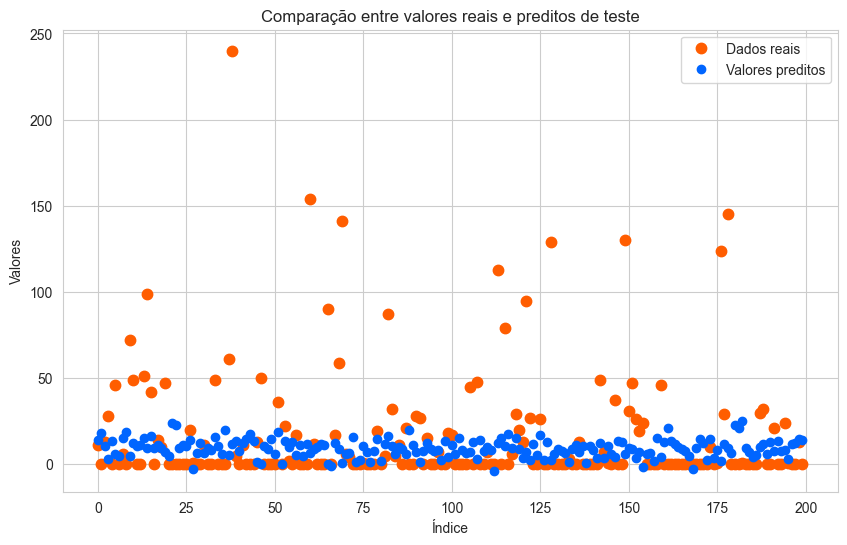

In [28]:
# Responda aqui

model = create_model(X.shape[1])

predict_teste = model.predict(X_test)
predict_teste = scaler_y.inverse_transform(predict_teste)

real_teste = scaler_y.inverse_transform(y_test)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
plt.plot(real_teste[:200], 'o', color='#ff5d00', markersize=7.5, label='Dados reais')
plt.plot(predict_teste[:200], 'o', color='#0065ff', markersize=6, label='Valores preditos')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Comparação entre valores reais e preditos de teste')
plt.legend()
plt.show()

## Questão 10: Análise dos Resultados para a Questão Principal da Prova

Nesta questão, você será solicitado a realizar uma análise crítica dos resultados obtidos e relacioná-los com a questão principal da prova.

**Nota:** Suas respostas devem ser bem fundamentadas, utilizando como base os conhecimentos técnicos adquiridos durante o curso e as observações feitas durante a realização da prova.


#### A - Análise de Underfitting
- **Analise** o gráfico gerado na questão anterior e as métricas do modelo selecionado.
- **Responda**: O modelo apresenta underfitting?
- **Justifique** sua resposta com base em suas observações e conhecimento técnico.

### Escreva neste bloco de markdown sua resposta

Considerando apenas os 200 primeiros valores da base, o modelo não apresenta uma acurácia muito boa, não acerta muitos valores, e pode ter causado um pouco de *underfitting*. Porém, considerando o erro médio quadrático da base completa de treino, teste, e validação como um todo, que foi calculado anteriormente em outras questões, é possível concluir que esse segmento da base apresentado no gráfico pode não ser uma boa representação da acurácia do modelo como um todo. Isso pode ser, também, uma consequência do modelo ter tido poucas épocas (apenas 20).


#### B - Relevância dos Atributos para Previsão
- **Refletindo** sobre a questão principal da prova, considere os atributos presentes na base de dados.
- **Responda**: Os atributos disponíveis parecem ser suficientemente relevantes para prever o tempo de atraso dos voos?
- **Não** precisa Justificar a resposta.

### Escreva neste bloco de markdown sua resposta

A base apresenta alguns dados que, intuitivamente, aparentam ser úteis para uma análise preditiva. Por exemplo, voos mais longos indicam voos a lugares mais distantes, possivelmente voos internacionais, então, deduzir que tais voos, por serem mais importantes, prestigiosos, e mais profissionais, teriam uma incidência menor de atrasos seria uma conclusão natural. O tipo de embarque e a qualidade do *check-in* podem significar maior eficiência no embarque, o que deveria acarretar em um processo mais ágil, portanto, menos atrasos. O tipo de viagem também é um indicativo forte de profissionalismo: viagens a trabalho tendem a ser levadas mais a sério pelo passageiro, portanto, menos atrasos. A satisfação do cliente também pode ser um indicativo forte de um voo sem atrasos significativos.

A base conta também com dados que, a princípio, não aparentam ser muito úteis para uma análise de atrasos, como limpeza, se o passageiro comeu ou bebeu no voo, se havia *wifi* ou entretenimento no voo; e outros dados em relação ao conforto no voo. Porém, tais dados não são completamente inúteis, porque podem dar contexto para a satisfação do cliente, o que é um dado que pode ser útil para a análise.